In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fmin_powell
from scipy.integrate import trapezoid
from scipy.integrate import simpson

# Trapecio

Supongamos que queremos aproximar la integral definida de una función $f(x)$ en el intervalo $[a, b]$. Para ello, dividimos el intervalo en $n$ subintervalos iguales de ancho $h = \frac{b-a}{n}$, y evaluamos la función en los puntos $x_0 = a, x_1 = a + h, x_2 = a + 2h, \dots, x_n = b$. Entonces, la aproximación de la integral se puede escribir como:

$$
\int_a^b f(x) dx \approx \frac{h}{2} \left[ f(a) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{n-1}) + f(b) \right]
$$

In [8]:
# Define una función llamada 'trap' que calcula la aproximación numérica de una integral mediante el método del trapecio.
def trap(f, a, b, Np):
    # Calcula el ancho de cada subintervalo.
    dx = (b - a) / Np

    # Inicializa una variable 's' para almacenar la suma acumulativa de las áreas de los trapecios.
    s = 0

    # Inicia un bucle para calcular la suma de áreas de los trapecios.
    for i in range(Np):
        # Calcula el área del trapecio y lo agrega a 's'.
        s += dx * f(a) + dx * (f(a + dx) - f(a)) / 2

        # Desplaza el punto de inicio del subintervalo al siguiente.
        a += dx

    # Retorna el resultado de la aproximación de la integral.
    return s

In [9]:
# Define una función llamada 'trapp' que calcula la aproximación numérica de una integral mediante el método del trapecio.
def trapp(f, a, b, Np):
    # Calcula el ancho de cada subintervalo.
    dx = (b - a) / Np

    # Calcula la suma ponderada de los valores de la función 'f' en los puntos del intervalo.
    s = (dx/2) * (-f[0] - f[-1] + 2*np.sum(f))

    # Retorna la aproximación numérica de la integral.
    return s

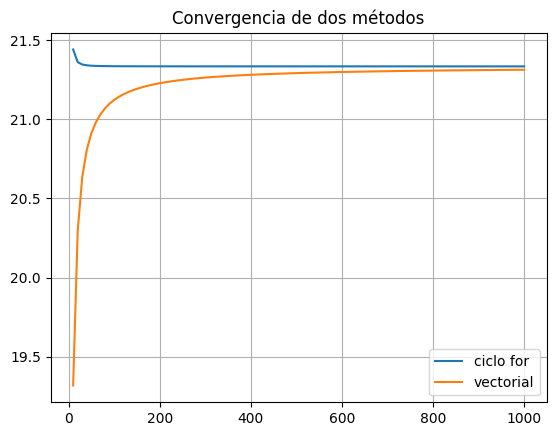

In [21]:
# Define los valores iniciales y de incremento para N_o, N_f y dx.
N_o = 10
N_f = 1000
dx = 10

# Define los límites del intervalo [a, b].
a = 0
b = 4

# Define una función cuadrática f(x) = x^2.
f = lambda x: x**2

# Inicializa variables para almacenar resultados.
j = 0
s = np.zeros(int((N_f - N_o) / dx) + 1)
ss = np.zeros(int((N_f - N_o) / dx) + 1)

# Genera una secuencia de valores de N_p utilizando np.arange.
N_p = np.arange(N_o, N_f + 1, dx)

# Inicia un bucle para calcular las aproximaciones numéricas de la integral.
for i in N_p:
    # Calcula la aproximación utilizando el método 'trap' para la función 'f'.
    s[j] = trap(f, a, b, i)

    # Genera valores de 'x' igualmente espaciados en el intervalo [a, b].
    x = np.linspace(a, b, i)

    # Calcula una nueva función 'ff' basada en los valores de 'x'.
    ff = x**2

    # Calcula la aproximación utilizando el método 'trapp' para la función 'ff'.
    ss[j] = trapp(ff, a, b, i)

    # Incrementa el índice para almacenar los resultados en los arreglos 's' y 'ss'.
    j += 1

# Grafica los resultados y muestra el gráfico.
plt.plot(N_p, s, label="ciclo for")
plt.plot(N_p, ss, label="vectorial")
plt.legend()
plt.title("Convergencia de dos métodos")
plt.grid()

plt.show()

In [11]:
func = sp.sympify(input("Ingresa tu función en formato código: "))
a = float(input("Ingrese incio del intervalo: "))
b = float(input("Ingrese final del intervalo: "))
n = int(input("Ingrese número de particiones del intervalo: "))
x = sp.symbols("x")
func_l = sp.lambdify(x, func, 'numpy')
print("La integral es: ", trap(func_l, a, b, n))

Ingresa tu función en formato código: x**2
Ingrese incio del intervalo: 0
Ingrese final del intervalo: 10
Ingrese número de particiones del intervalo: 1000
La integral es:  333.3334999999902


In [12]:
func

x**2

Optimization terminated successfully.
         Current function value: -1.448856
         Iterations: 2
         Function evaluations: 22
El máximo es: 2.4985561902768487
Valor de la segunda derivada en el máximo: 1.6481204874585245
Número de iteraciones: 94
La integral es:  3.677655509423657


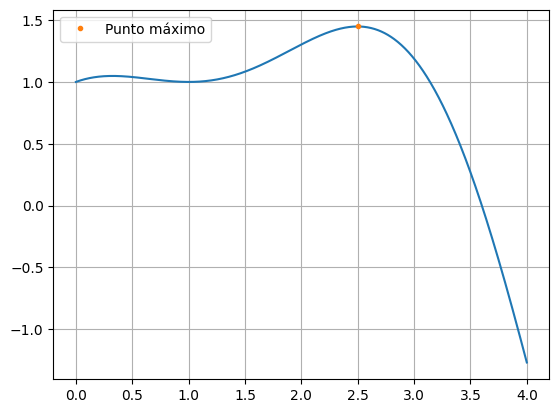

In [13]:
# Define el símbolo x
x = sp.symbols("x")

# Define los límites de integración y la tolerancia
a = 0
b = 4
e = 10e-4

# Define la función f y su reflexión con el eje x
f = (x - 1)**2 * sp.sin(x) / 3 + 1
ff = -((x - 1)**2 * sp.sin(x) / 3 + 1)

# Calcula las derivadas de f y df
df = sp.diff(f, x)
ddf = sp.diff(df, x)

# Convierte las funciones simbólicas en funciones lambda para numpy
f_l = sp.lambdify(x, f, 'numpy')
ff_l = sp.lambdify(x, ff, 'numpy')
ddf_l = sp.lambdify(x, ddf, 'numpy')

# Encuentra el mínimo de ff que es el máximo de f utilizando fmin_powell
csi = fmin_powell(ff_l, (a + b) / 2)[0]
print("El máximo es:", csi)

# Calcula el valor absoluto de la segunda derivada en el máximo
ddf_csi = abs(ddf_l(csi))
print("Valor de la segunda derivada en el máximo:", ddf_csi)

# Calcula el número de iteraciones necesario para la integral
n = round(((b - a) ** 3 / (12 * e) * ddf_csi) ** (1 / 2))
print("Número de iteraciones:", n)

# Calcula la integral de f utilizando la regla del trapecio
print("La integral es: ", trap(f_l, a, b, n))

# Grafica la función y el máximo
xx = np.linspace(a, b, 1000)
plt.plot(xx, f_l(xx))
plt.plot(csi, f_l(csi),".", label = "Punto máximo")
plt.grid(True)
plt.legend()

In [14]:
# Calcula la integral con la regla del trapecio usando los puntos 'xx' y 'f_l(xx)'
pann = trapezoid(f_l(xx), xx)

# Calcula la integral con la funcíón trap
pan = trap(f_l, a, b, n)

# Calcula el error absoluto entre las dos aproximaciones de la integral
error = abs(pann - pan)

print("El error absoluto entre las dos aproximaciones es:", error)

El error absoluto entre las dos aproximaciones es: 0.0005695279791697594


## Simpson

In [15]:
def simpson_(a, b, f):
  # Calcula una aproximación de la integral definida utilizando la regla de Simpson.
  s = (b - a)/6 * (f(a) + 4*f((a + b)/2) + f(b))  # Fórmula de la regla de Simpson
  return s  # Devuelve la aproximación de la integral.

# Este código define una función para calcular integrales usando la regla de Simpson.

In [16]:
f = lambda x: np.sin(x)  # Define una función lambda que representa la función f(x) = sen(x).

a = 0  # Límite inferior del intervalo de integración.
b = np.pi/2  # Límite superior del intervalo de integración.

simp = simpson_(a, b, f)  # Utiliza la función 'simpson_' para aproximar la integral de sen(x) en el intervalo [0, 2π].
print("La integral es: ", simp)  # Imprime el resultado de la aproximación de la integral.

# Este código utiliza la función 'simpson_' para aproximar la integral de sen(x) en el intervalo [0, 2π].

La integral es:  1.0022798774922104


In [17]:
def simpson_1(a, b, n, f):
  # Calcula una aproximación de la integral definida utilizando la regla compuesta de Simpson.

  h = (b - a)/n  # Calcula el ancho de cada subintervalo.
  x = np.linspace(a, b, n)  # Genera los puntos equidistantes en el intervalo [a, b].

  s_1 = 0
  s_2 = 0
  for j in range(1, int((n/2))):
    s_1 += f(x[2*j])  # Suma las evaluaciones de la función en puntos pares.
    s_2 += f(x[2*j - 1])  # Suma las evaluaciones de la función en puntos impares.

  s_2 += f(x[n-1])  # Agrega la evaluación de la función en el punto final.

  s = (h/3)*(f(a) + 2 * s_1 + 4 * s_2 + f(b))  # Fórmula de la regla compuesta de Simpson.
  return s  # Devuelve la aproximación de la integral.

# Este código define una función para calcular integrales usando la regla compuesta de Simpson.

In [18]:
f = lambda x: np.sin(x)  # Define una función lambda que representa la función f(x) = sen(x).

a = 0  # Límite inferior del intervalo de integración.
b = np.pi/2  # Límite superior del intervalo de integración.
n = 10000  # Número de subintervalos para dividir el intervalo [a, b].

simp_1 = simpson_1(a, b, n, f)  # Utiliza la función 'simpson_1' para aproximar la integral de sen(x) en el intervalo [0, π/2] con 2000 subintervalos.
print("La integral es: ", simp_1)  # Imprime el resultado de la aproximación.

# Este código utiliza la función 'simpson_1' para aproximar la integral de sen(x) en el intervalo [0, π/2].

La integral es:  1.0000570796326789


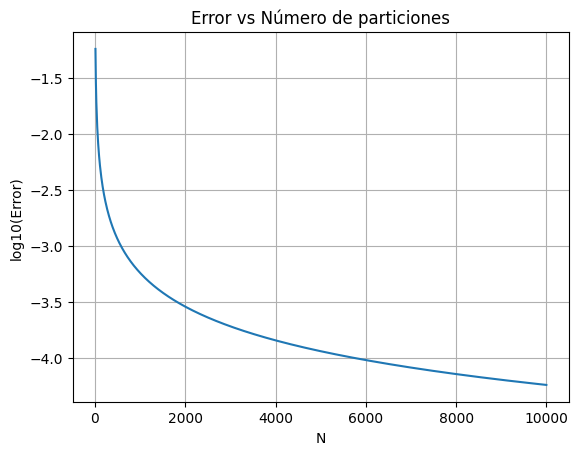

In [19]:
N = np.arange(10, 10001, 10)
Err = np.zeros(len(N))  # Crea un arreglo de ceros de la misma longitud que el arreglo N para almacenar los errores.

j = 0  # Inicializa un contador.
for i in N:
  x = np.linspace(a, b, i)  # Genera puntos equidistantes en el intervalo [a, b] con un nuevo número de subintervalos 'i'.
  ff = np.sin(x)  # Calcula los valores de la función sen(x) en los nuevos puntos.
  simp_0 = simpson(ff, x)  # Calcula la integral de la función sen(x) con la nueva discretización utilizando la función 'simpson'.
  Err[j] = abs(simpson_1(a, b, i, f) - simp_0)  # Calcula el error entre las aproximaciones de 'simpson_1' y 'simpson' y lo almacena en el arreglo 'Err'.
  j += 1  # Incrementa el contador.

plt.plot(N, np.log10(Err))  # Grafica el logaritmo en base 10 del arreglo de errores en función de 'N'.
plt.grid(True)
plt.xlabel("N")
plt.ylabel("log10(Error)")
plt.title("Error vs Número de particiones")
plt.show()

# Este código realiza un análisis de errores al comparar la aproximación de la integral usando 'simpson_1' con 'simpson'.